In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

from matplotlib.ticker import FuncFormatter

import plotly.express as px
import plotly.graph_objects as go

C:\Users\erinm\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
donations13to17=pd.read_feather('donations13to17.ftr')

In [3]:
#keep only relevant columnns from full dataset
amounts1=donations13to17[['id','cohort','yr0','yr1','amount_yr0','amount_yr1']].copy().sort_values('amount_yr0').reset_index(drop=True)

In [4]:
amounts1['retention_yr1']=amounts1['yr1']/amounts1['yr0']

In [5]:
amounts1['group2']=pd.qcut(amounts1.index, q=2, labels=False)
amounts1['group4']=pd.qcut(amounts1.index, q=4, labels=False)
amounts1['group8']=pd.qcut(amounts1.index, q=8, labels=False)
amounts1['group16']=pd.qcut(amounts1.index, q=16, labels=False)
amounts1['group32']=pd.qcut(amounts1.index, q=32, labels=False)
amounts1['group64']=pd.qcut(amounts1.index, q=64, labels=False)
amounts1['group128']=pd.qcut(amounts1.index, q=128, labels=False)
amounts1['group256']=pd.qcut(amounts1.index, q=256, labels=False)
amounts1['group512']=pd.qcut(amounts1.index, q=512, labels=False)
amounts1['group1024']=pd.qcut(amounts1.index, q=1024, labels=False)

In [15]:
amounts1.group1024.value_counts(normalize=False)

1023    1833
451     1833
467     1833
465     1833
463     1833
        ... 
427     1832
425     1832
815     1832
423     1832
511     1832
Name: group1024, Length: 1024, dtype: int64

In [169]:
amounts1.query('group16 == 5').amount_yr0.describe()

count    117280.0
mean         25.0
std           0.0
min          25.0
25%          25.0
50%          25.0
75%          25.0
max          25.0
Name: amount_yr0, dtype: float64

### 3a. 2 groups (amount_yr0) by cohort

In [224]:
df=amounts1.groupby(['cohort','group2']).agg({'yr0':'sum','yr1':'sum','retention_yr1':'mean'}).reset_index()

conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_overall_retention']=np.select(conditions, choices)

df['group']=df['group2'].astype(str)

df['comparative_retention']=np.where(df['retention_yr1']>df['cohort_overall_retention'],"higher",'lower')

''

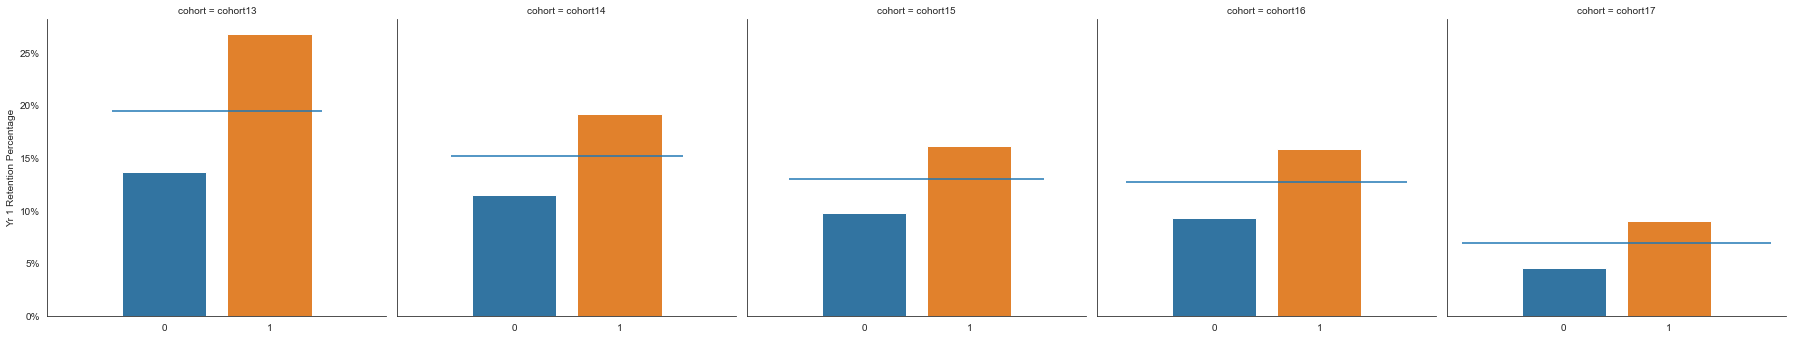

In [229]:
g = sns.catplot(x='group', y='retention_yr1', #hue='group2', 
                col='cohort', 
                #col_wrap=3, 
                data=df, 
                kind='bar')

(g.set_axis_labels("", "Yr 1 Retention Percentage"))

# # draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
# ax.update_xaxes(type='category')
;

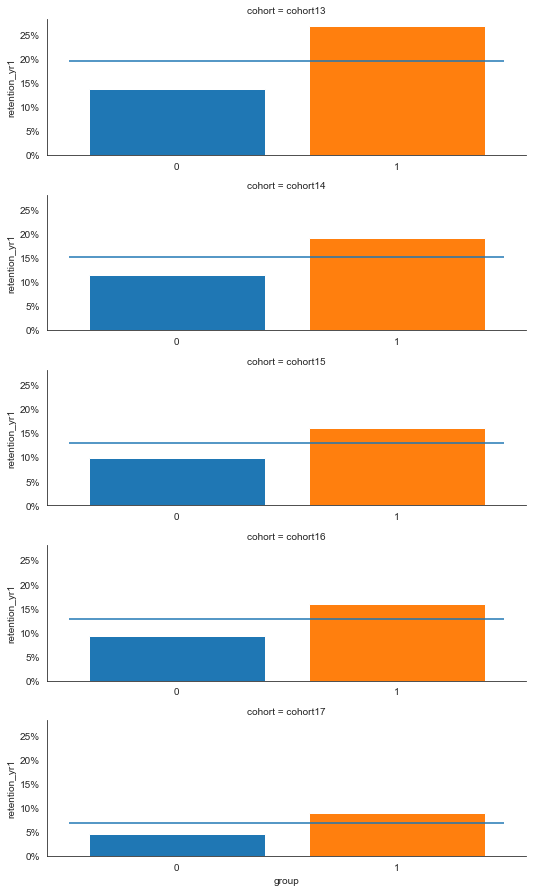

In [227]:
g = sns.FacetGrid(df, row='cohort',hue='comparative_retention',sharey=True, sharex=False, height=2.5, aspect = 3)
g = g.map(plt.bar, 'group', 'retention_yr1')

# draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

### 3b. 4 groups (amount_yr0) by cohort

In [230]:
df=amounts1.groupby(['cohort','group4']).agg({'yr0':'sum','yr1':'sum','retention_yr1':'mean'}).reset_index()

conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_overall_retention']=np.select(conditions, choices)

df['group']=df['group4'].astype(str)

df['comparative_retention']=np.where(df['retention_yr1']>df['cohort_overall_retention'],"higher",'lower')

''

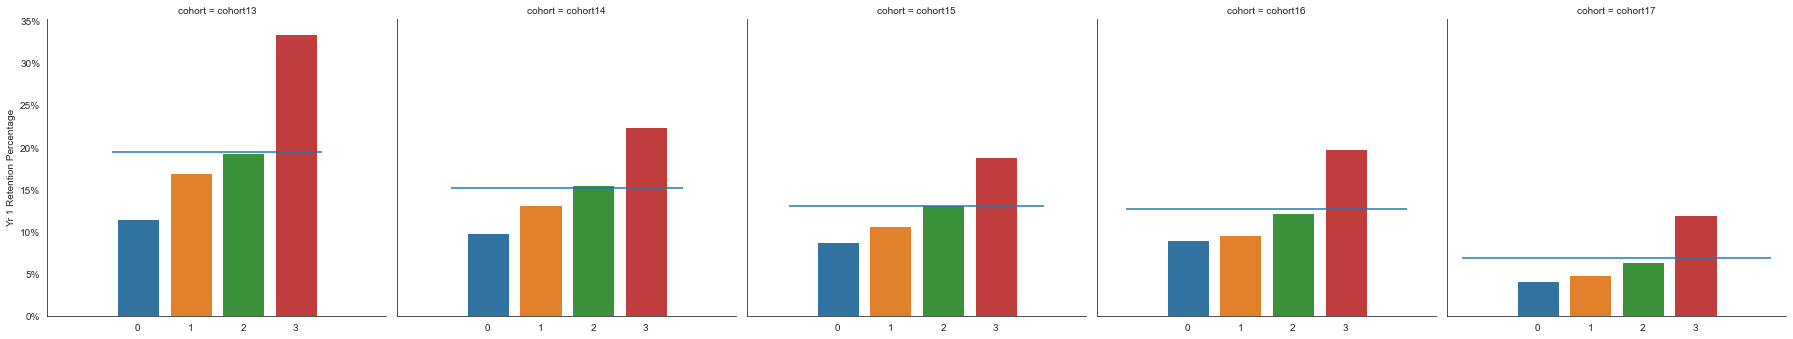

In [231]:
g = sns.catplot(x='group', y='retention_yr1', #hue='group2', 
                col='cohort', 
                #col_wrap=3, 
                data=df, 
                kind='bar')

(g.set_axis_labels("", "Yr 1 Retention Percentage"))

# # draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
# ax.update_xaxes(type='category')
;

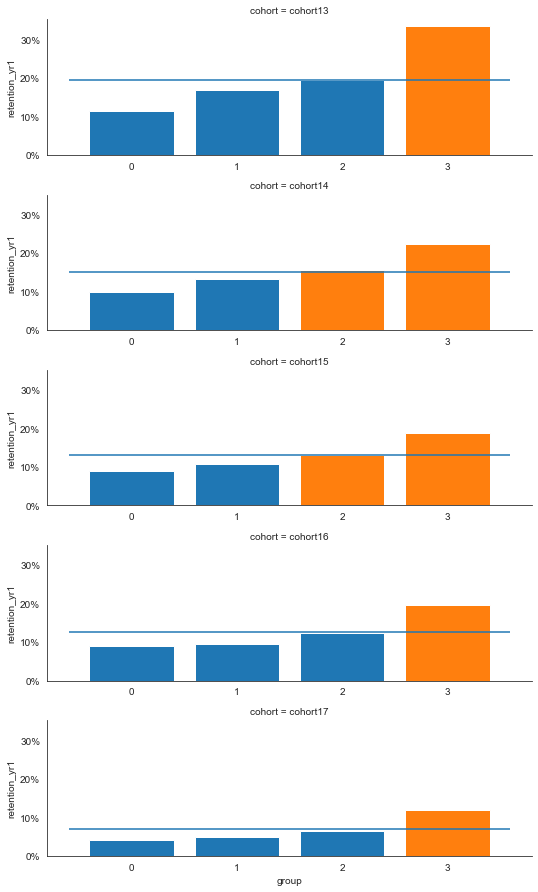

In [232]:
g = sns.FacetGrid(df, row='cohort',hue='comparative_retention',sharey=True, sharex=False, height=2.5, aspect = 3)
g = g.map(plt.bar, 'group', 'retention_yr1')

# draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

### 3c. 8 groups (amount_yr0) by cohort

In [233]:
df=amounts1.groupby(['cohort','group8']).agg({'yr0':'sum','yr1':'sum','retention_yr1':'mean'}).reset_index()

conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_overall_retention']=np.select(conditions, choices)

df['group']=df['group8'].astype(str)

df['comparative_retention']=np.where(df['retention_yr1']>df['cohort_overall_retention'],"higher",'lower')

''

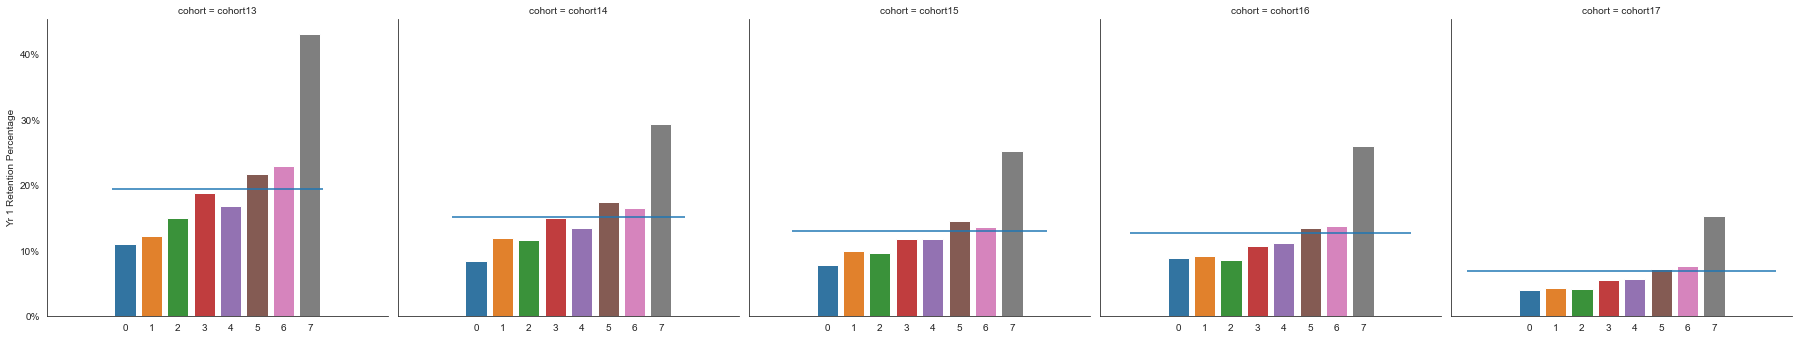

In [189]:
g = sns.catplot(x='group', y='retention_yr1', #hue='group2', 
                col='cohort', 
                #col_wrap=3, 
                data=df, 
                kind='bar')

(g.set_axis_labels("", "Yr 1 Retention Percentage"))

# # draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
# ax.update_xaxes(type='category')
;

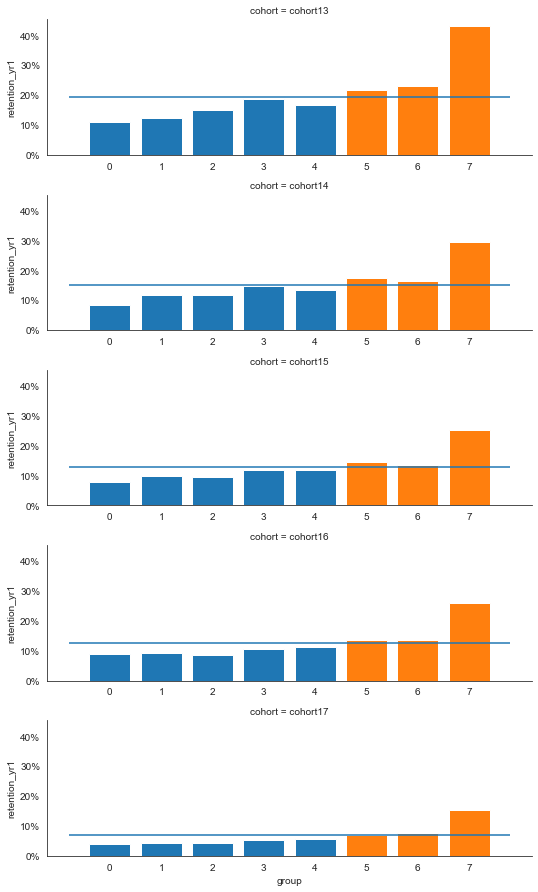

In [234]:
g = sns.FacetGrid(df, row='cohort',hue='comparative_retention',sharey=True, sharex=False, height=2.5, aspect = 3)
g = g.map(plt.bar, 'group', 'retention_yr1')

# draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

### 3d. 16 groups (amount_yr0) by cohort

In [235]:
df=amounts1.groupby(['cohort','group16']).agg({'yr0':'sum','yr1':'sum','retention_yr1':'mean'}).reset_index()

conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_overall_retention']=np.select(conditions, choices)

df['group']=df['group16'].astype(str)

df['comparative_retention']=np.where(df['retention_yr1']>df['cohort_overall_retention'],"higher",'lower')

''

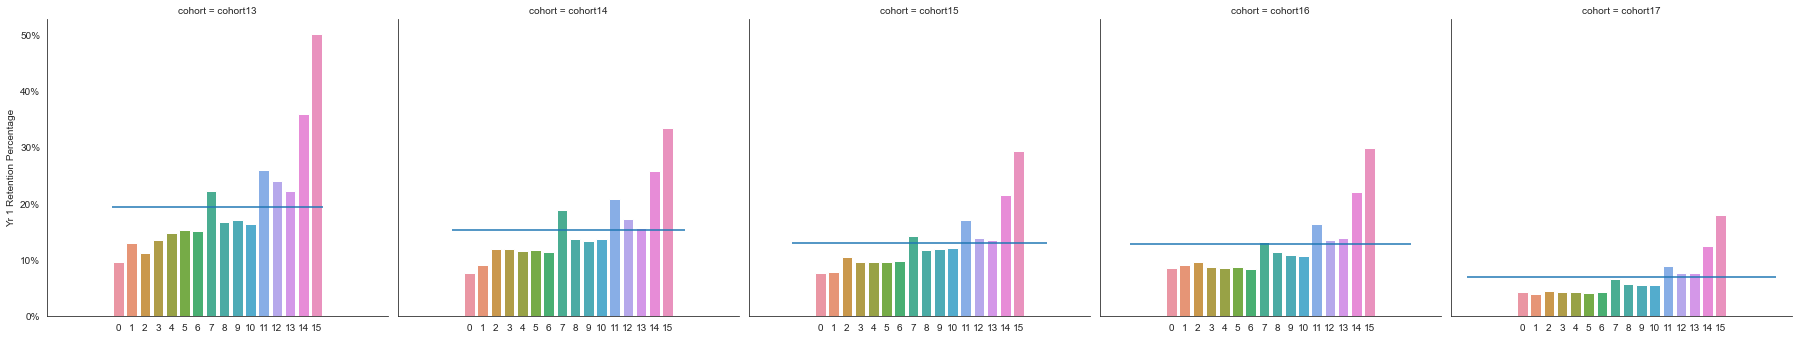

In [192]:
g = sns.catplot(x='group16', y='retention_yr1', #hue='group2', 
                col='cohort', 
                #col_wrap=3, 
                data=df, 
                kind='bar')

(g.set_axis_labels("", "Yr 1 Retention Percentage"))

# # draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
# ax.update_xaxes(type='category')
;

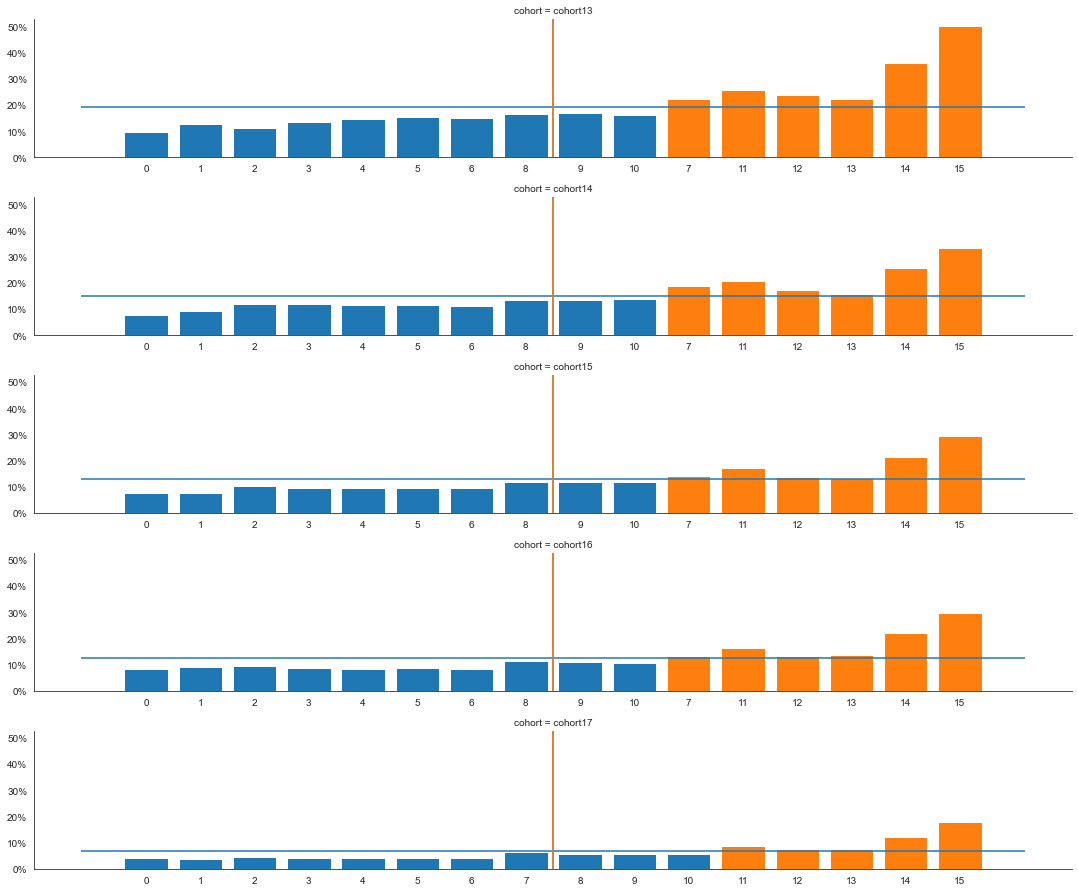

In [236]:
g = sns.FacetGrid(df, row='cohort',hue='comparative_retention',sharey=True, sharex=False, height=2.5, aspect = 6)
g = g.map(plt.bar, 'group', 'retention_yr1')

# draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

g.map(plt.axvline, x=7.5)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

### 3e. 32 groups (amount_yr0) by cohort

In [237]:
df=amounts1.groupby(['cohort','group32']).agg({'yr0':'sum','yr1':'sum','retention_yr1':'mean'}).reset_index().sort_values('group32')

conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_overall_retention']=np.select(conditions, choices)

df['group']=df['group32'].astype(str)
df['comparative_retention']=np.where(df['retention_yr1']>df['cohort_overall_retention'],"higher",'lower')

''

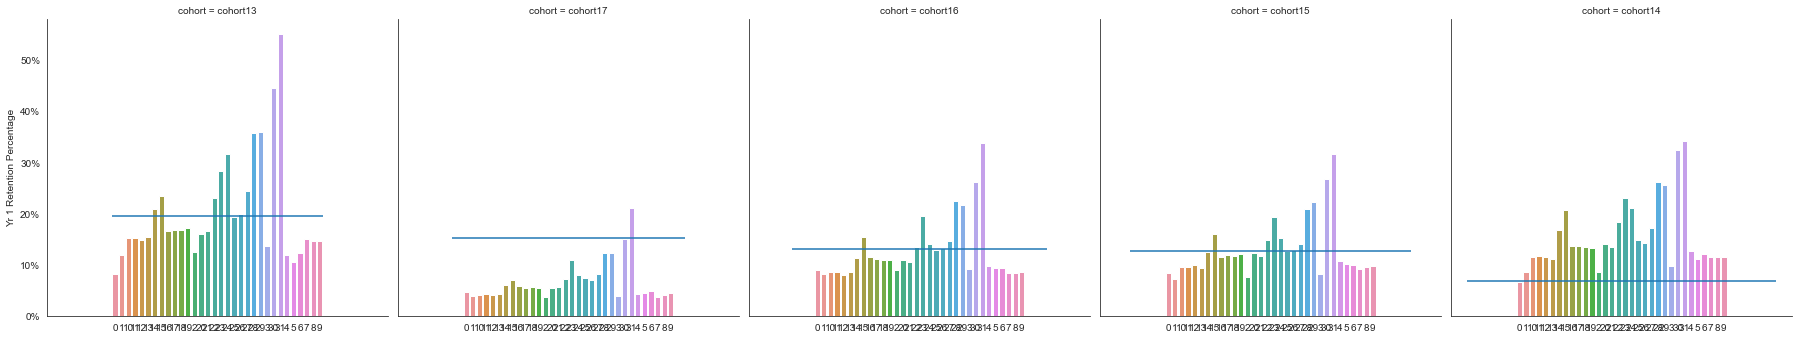

In [199]:
g = sns.catplot(x='group', y='retention_yr1', #hue='group2', 
                col='cohort', 
                #col_wrap=3, 
                data=df, 
                kind='bar')

(g.set_axis_labels("", "Yr 1 Retention Percentage"))

# # draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
;

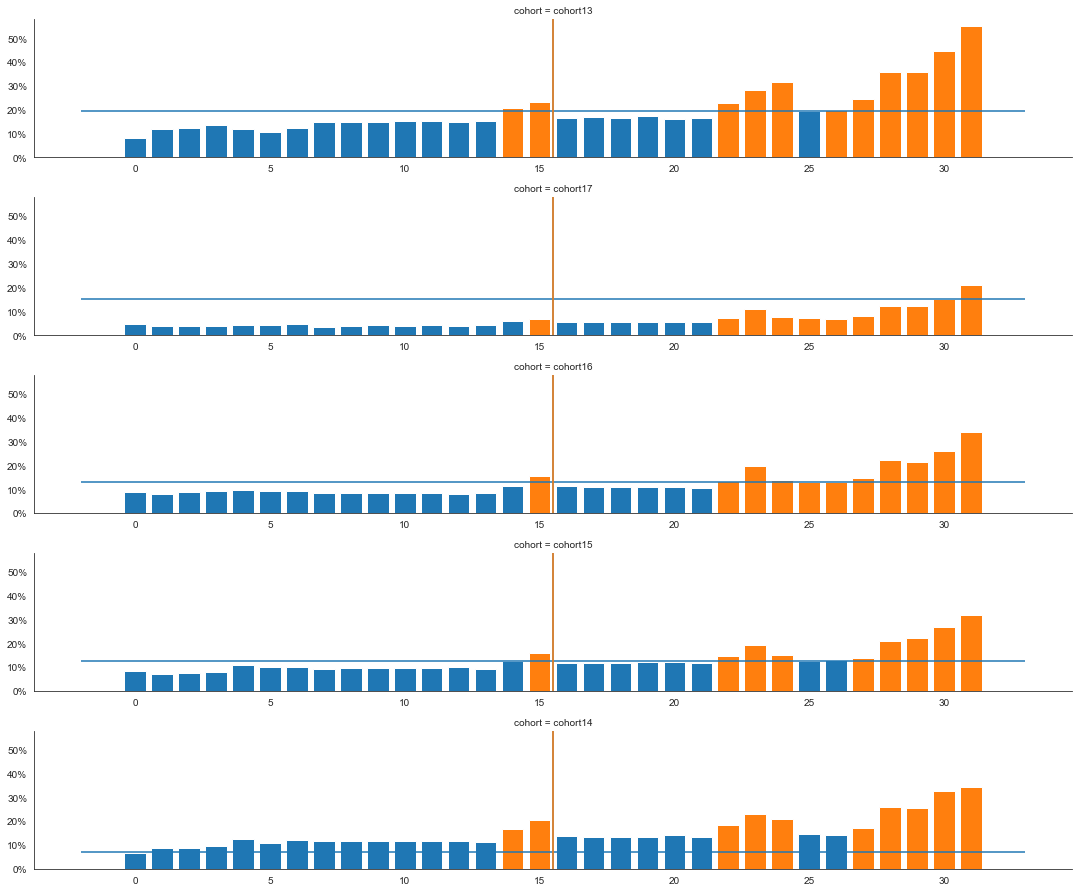

In [238]:
groups=32
g = sns.FacetGrid(df, row='cohort',hue='comparative_retention',sharey=True, sharex=False, height=2.5, aspect = 6)
g = g.map(plt.bar, 'group32', 'retention_yr1')

# draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

g.map(plt.axvline, x=(groups/2-.5))

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

### 3f. 64 groups (amount_yr0) by cohort

In [239]:
df=amounts1.groupby(['cohort','group64']).agg({'yr0':'sum','yr1':'sum','retention_yr1':'mean'}).reset_index()

conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_overall_retention']=np.select(conditions, choices)

df['group']=df['group64'].astype(str)
df['comparative_retention']=np.where(df['retention_yr1']>df['cohort_overall_retention'],"higher",'lower')

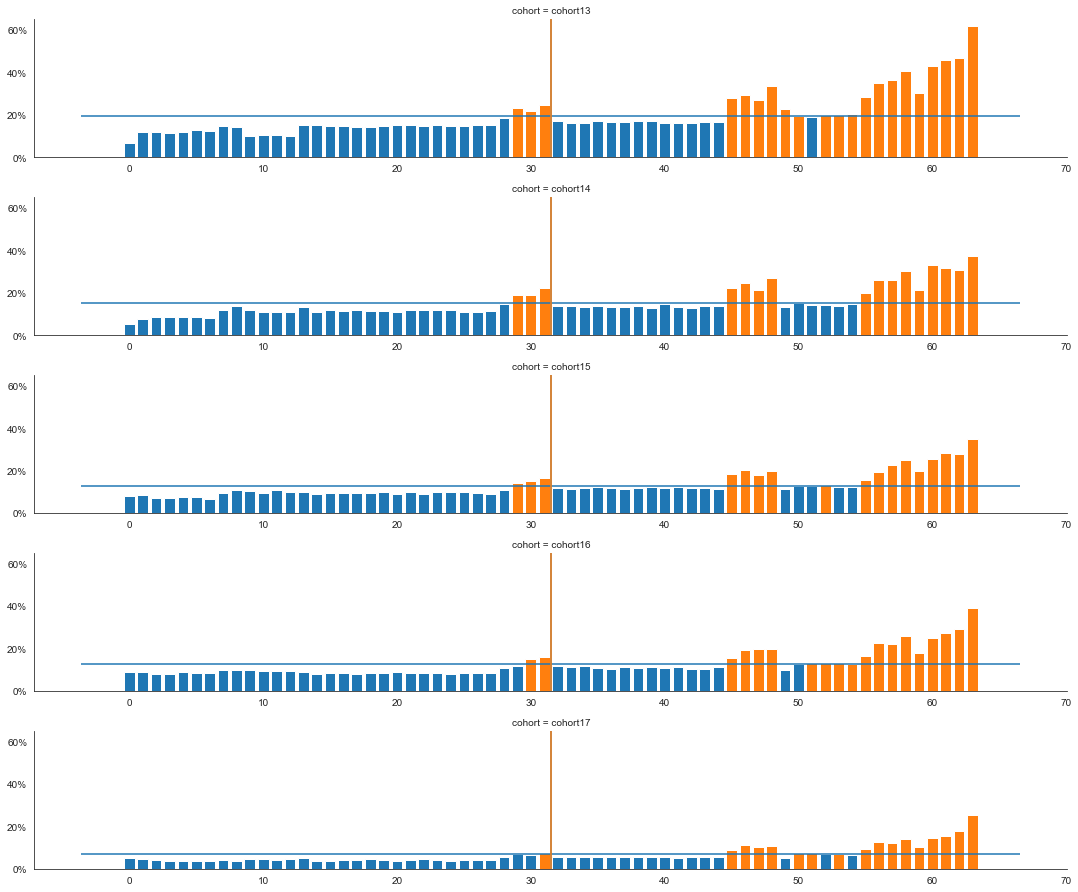

In [240]:
groups=64
g = sns.FacetGrid(df, row='cohort',hue='comparative_retention',sharey=True, sharex=False, height=2.5, aspect = 6)
g = g.map(plt.bar, 'group64', 'retention_yr1')

# draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())
    
g.map(plt.axvline, x=(groups/2-.5))

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [256]:
df=amounts1.groupby(['cohort','group128']).agg({'yr0':'sum','yr1':'sum','retention_yr1':'mean'}).reset_index()

conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_overall_retention']=np.select(conditions, choices)

df['group']=df['group128'].astype(str)
df['comparative_retention']=np.where(df['retention_yr1']>df['cohort_overall_retention'],"higher",'lower')

In [212]:
fig = px.line(df, x="group128", y="retention_yr1", 
                 color="cohort",
                 #size='petal_length', hover_data=['petal_width']
                )
fig.show()

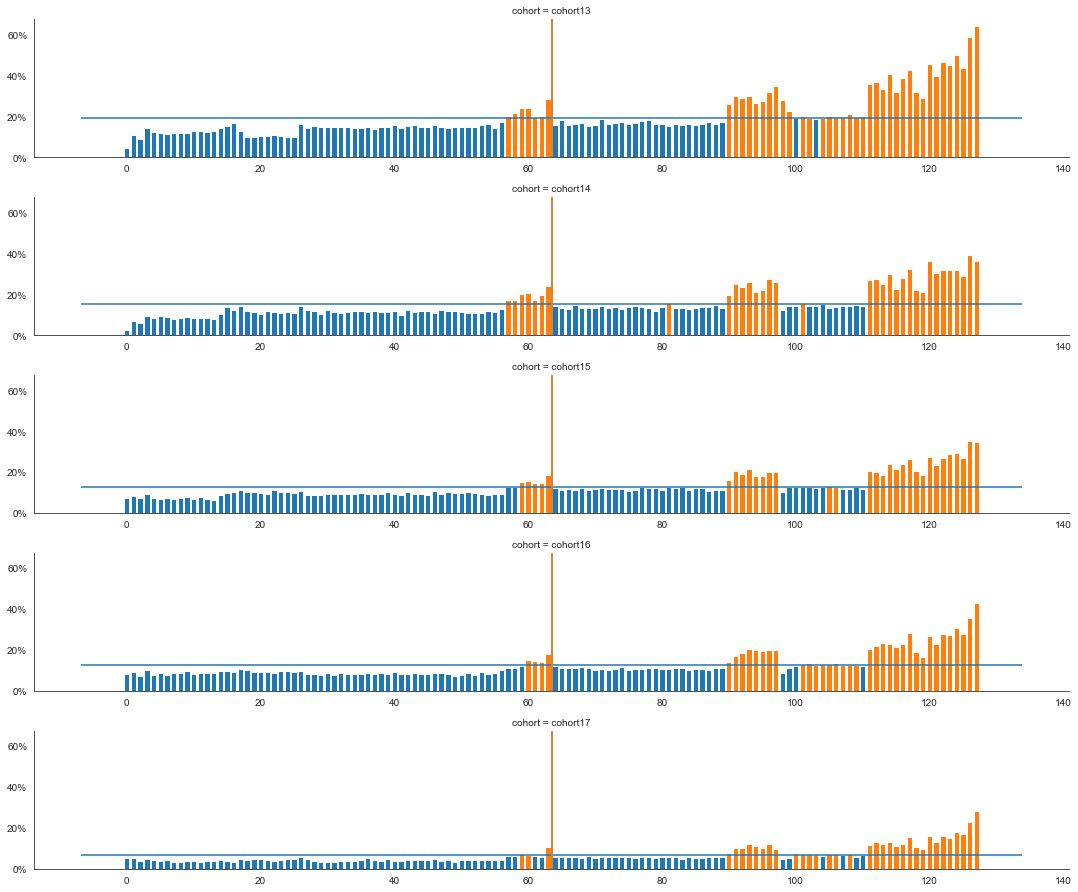

In [242]:
groups=128
g = sns.FacetGrid(df, row='cohort',hue='comparative_retention',sharey=True, sharex=False, height=2.5, aspect = 6
                 )
g = g.map(plt.bar, 'group128', 'retention_yr1')

# draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

g.map(plt.axvline, x=(groups/2-.5))

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [ ]:
# when 128 groups, every cohort had higher than average retention for groups 60($35-39.22), 63 ($41.89-48.44), 90-97 ($50-99), & 111-127 ($100 to max)

In [269]:
df.query('comparative_retention == "higher"').group128.value_counts(sort=False)

57     2
58     2
59     4
60     5
61     4
62     4
63     5
81     1
90     5
91     5
92     5
93     5
94     5
95     5
96     5
97     5
98     1
99     1
100    1
101    4
102    3
103    2
104    2
105    4
106    4
107    2
108    3
109    2
110    1
111    5
112    5
113    5
114    5
115    5
116    5
117    5
118    5
119    5
120    5
121    5
122    5
123    5
124    5
125    5
126    5
127    5
Name: group128, dtype: int64

In [267]:
amounts1.query('group128 == 60').amount_yr0.describe()

count    14660.000000
mean        35.858288
std          1.248618
min         35.000000
25%         35.000000
50%         35.000000
75%         36.340000
max         39.220000
Name: amount_yr0, dtype: float64

In [266]:
amounts1.query('group128 == 63').amount_yr0.describe()

count    14660.000000
mean        45.104447
std          1.431115
min         41.890000
25%         45.000000
50%         45.000000
75%         45.340000
max         48.440000
Name: amount_yr0, dtype: float64

In [265]:
amounts1.query('group128 >= 90 & group128 <=97').amount_yr0.describe()

count    117280.000000
mean         71.744207
std          12.590190
min          50.000000
25%          60.000000
50%          75.000000
75%          77.262500
max          99.000000
Name: amount_yr0, dtype: float64

In [263]:
amounts1.query('group128 >= 111').amount_yr0.describe()

count    249219.000000
mean        380.143958
std        1935.227451
min         100.000000
25%         150.000000
50%         200.000000
75%         337.465000
max      634709.970000
Name: amount_yr0, dtype: float64

In [254]:
amounts1.query('group128 == 60').amount_yr0.describe()

count    14660.000000
mean        35.858288
std          1.248618
min         35.000000
25%         35.000000
50%         35.000000
75%         36.340000
max         39.220000
Name: amount_yr0, dtype: float64

In [243]:
df=amounts1.groupby(['cohort','group256']).agg({'yr0':'sum','yr1':'sum','retention_yr1':'mean'}).reset_index()

conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_overall_retention']=np.select(conditions, choices)

df['group']=df['group256'].astype(str)
df['comparative_retention']=np.where(df['retention_yr1']>df['cohort_overall_retention'],"higher",'lower')

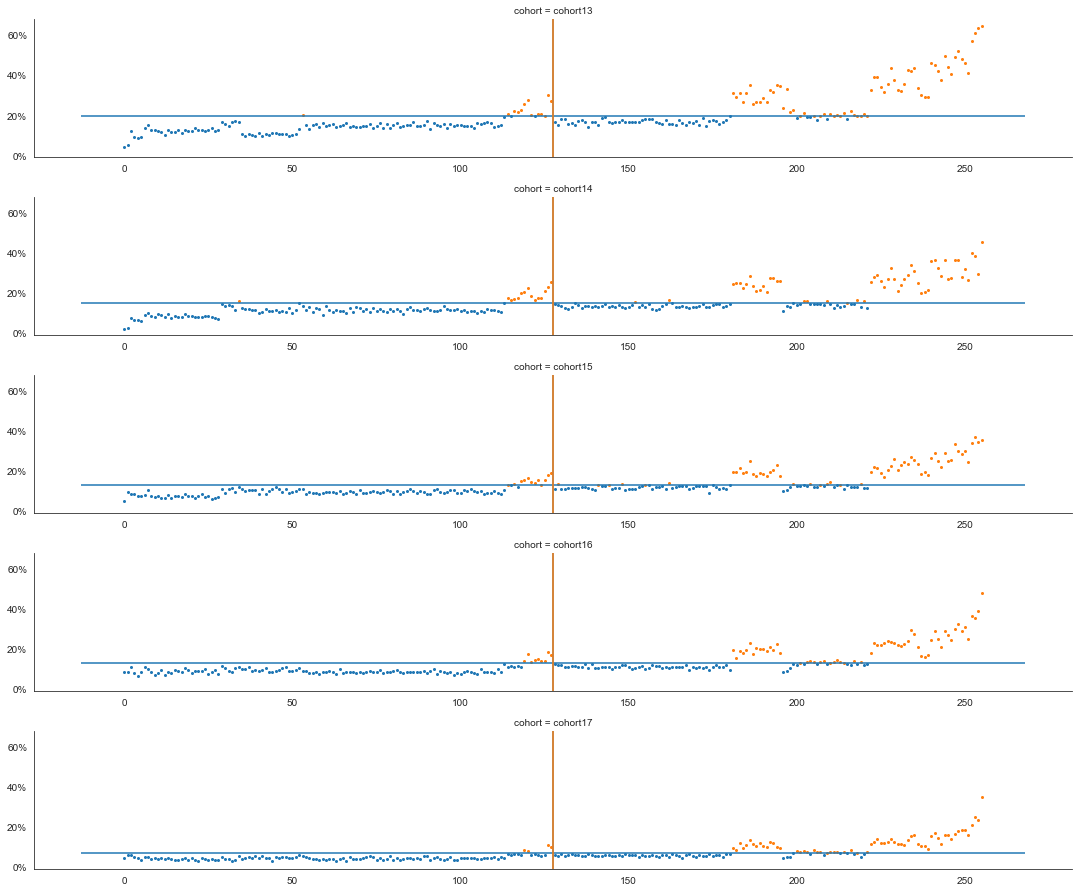

In [244]:
groups=256
g = sns.FacetGrid(df, row='cohort', hue='comparative_retention',
                  sharey=True, sharex=False, height=2.5, aspect = 6
                 )
g = g.map(plt.scatter, 'group256', 'retention_yr1',s=4)

# draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())
    
g.map(plt.axvline, x=(groups/2-.5))

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [245]:
df=amounts1.groupby(['cohort','group512']).agg({'yr0':'sum','yr1':'sum','retention_yr1':'mean'}).reset_index()

conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_overall_retention']=np.select(conditions, choices)

df['group']=df['group512'].astype(str)
df['comparative_retention']=np.where(df['retention_yr1']>df['cohort_overall_retention'],"higher",'lower')

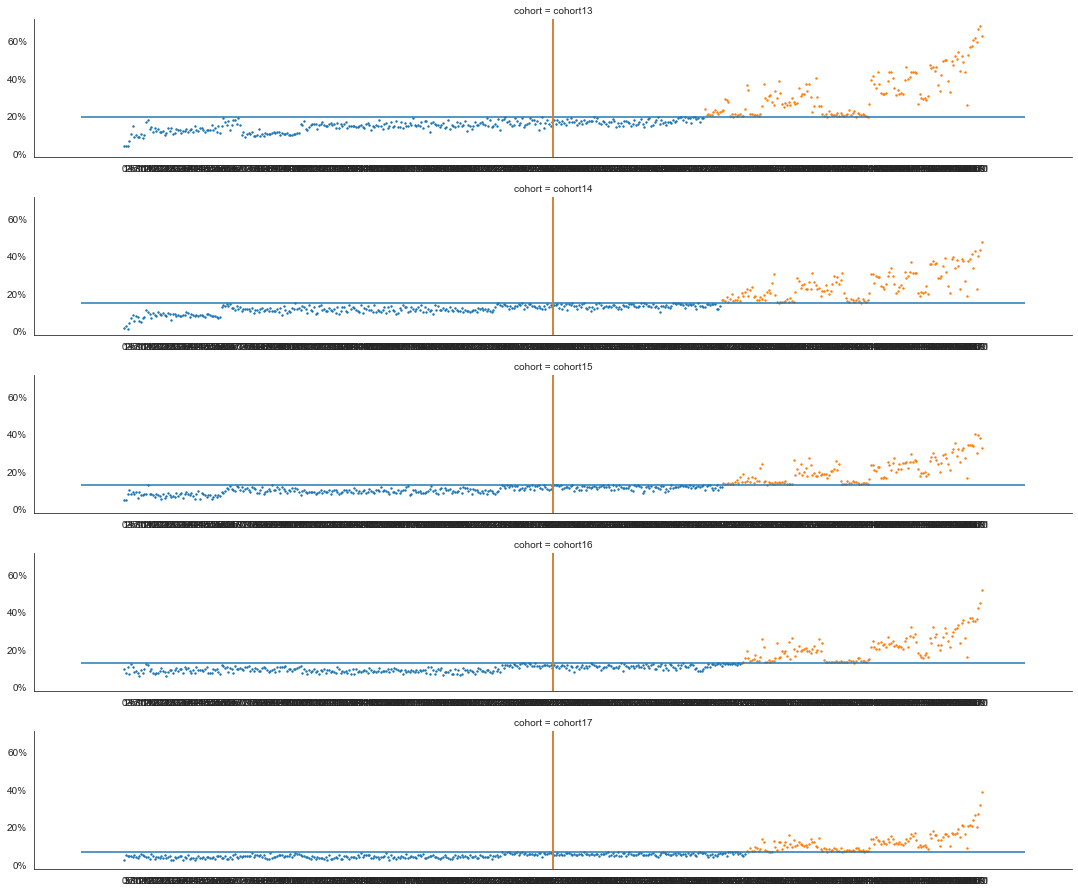

In [246]:
groups=512
g = sns.FacetGrid(df, row='cohort', hue='comparative_retention',
                  sharey=True, sharex=False, height=2.5, aspect = 6
                 )
g = g.map(plt.scatter, 'group', 'retention_yr1',s=2)

# draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

g.map(plt.axvline, x=(groups/2-.5))

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [270]:
df=amounts1.groupby(['cohort','group1024']).agg({'yr0':'sum','yr1':'sum','retention_yr1':'mean'}).reset_index()

conditions=[
    df['cohort'] == "cohort13",
    df['cohort'] == "cohort14",
    df['cohort'] == "cohort15",
    df['cohort'] == "cohort16",
    df['cohort'] == "cohort17"
]

choices=[df.query('cohort == "cohort13"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort13"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort14"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort14"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort15"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort15"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort16"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort16"').groupby('cohort').sum()['yr0'],
         df.query('cohort == "cohort17"').groupby('cohort').sum()['yr1']/df.query('cohort == "cohort17"').groupby('cohort').sum()['yr0']]

df['cohort_overall_retention']=np.select(conditions, choices)

df['group']=df['group1024'].astype(str)

df['comparative_retention']=np.where(df['retention_yr1']>df['cohort_overall_retention'],"higher",'lower')

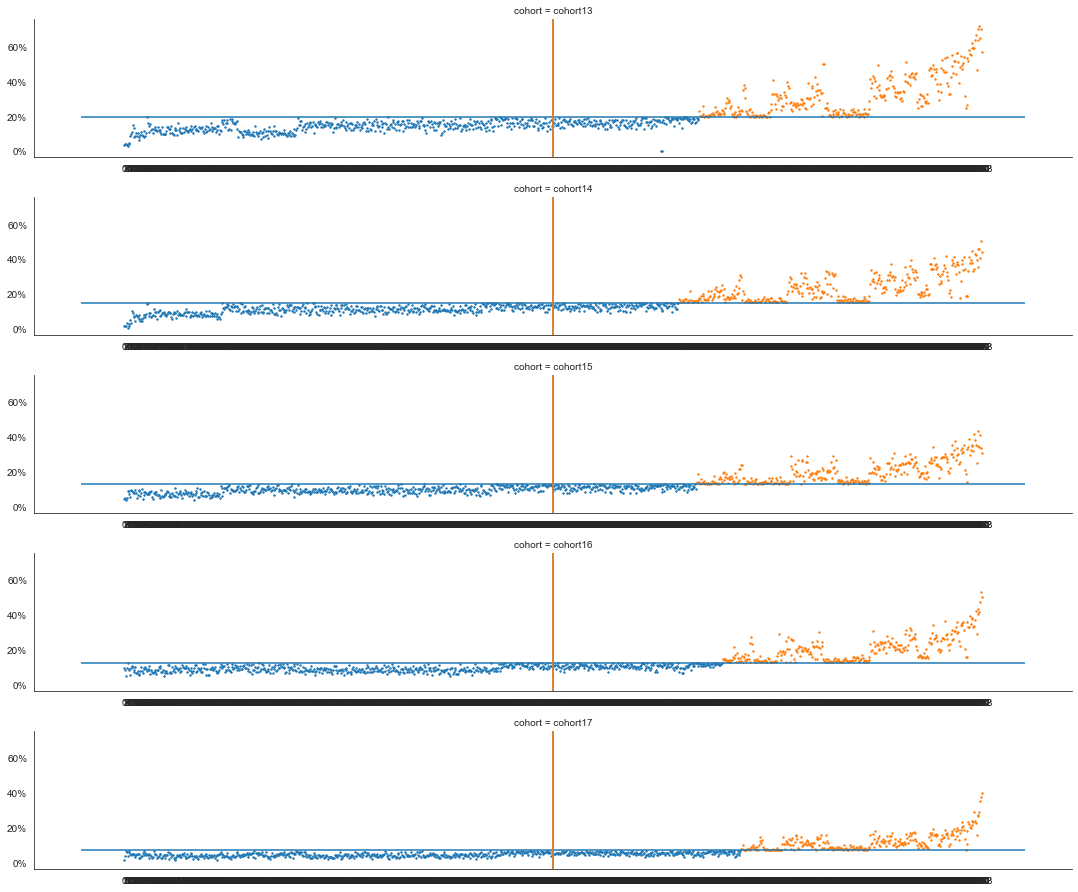

In [248]:
groups=1024
g = sns.FacetGrid(df, row='cohort', hue='comparative_retention',
                  sharey=True, sharex=False, height=2.5, aspect = 6
                 )
g = g.map(plt.scatter, 'group', 'retention_yr1', s=2)

# draw lines:
for m,ax in zip(df.groupby('cohort').cohort_overall_retention.mean(), g.axes.ravel()):
    ax.hlines(m,*ax.get_xlim())

g.map(plt.axvline, x=(groups/2-.5))

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [288]:
cr1024=df.query('comparative_retention == "higher"').group1024.value_counts(sort=False).reset_index()

In [289]:
cr1024.columns

Index(['index', 'group1024'], dtype='object')

In [290]:
cr1024_5=cr1024.query('group1024 >= 5')

In [291]:
cr1024_5['index'].to_list()

[137,
 477,
 478,
 479,
 481,
 482,
 483,
 484,
 505,
 506,
 507,
 508,
 509,
 724,
 726,
 727,
 728,
 731,
 732,
 733,
 734,
 735,
 736,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782,
 811,
 841,
 843,
 888,
 889,
 890,
 891,
 892,
 893,
 894,
 895,
 896,
 897,
 898,
 899,
 900,
 901,
 902,
 903,
 904,
 905,
 906,
 907,
 908,
 909,
 910,
 911,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 919,
 920,
 921,
 922,
 923,
 924,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984

In [302]:
#1024 groups where all 5 cohorts had greater than average retention
# 137: $15.76-17.36
# 477-479: $34-35
# 481-484: $35-35.97
# 505-509 $43.41-$45.34
# 724,
# 726-728,
# 731-736,
# 739-782,
# 811
# 841,
# 843,
# 888-1016: $100-996.25
# 1018-1023

In [293]:
amounts1.query('group1024 == 137').amount_yr0.describe()

count    1833.000000
mean       16.514152
std         0.484565
min        15.760000
25%        16.000000
50%        16.500000
75%        17.000000
max        17.360000
Name: amount_yr0, dtype: float64

In [294]:
amounts1.query('group1024 >= 477 & group1024 <=479').amount_yr0.describe()

count    5497.000000
mean       34.888930
std         0.278136
min        34.000000
25%        35.000000
50%        35.000000
75%        35.000000
max        35.000000
Name: amount_yr0, dtype: float64

In [297]:
amounts1.query('group1024 >= 481 & group1024 <=484').amount_yr0.describe()

count    7330.000000
mean       35.049091
std         0.173094
min        35.000000
25%        35.000000
50%        35.000000
75%        35.000000
max        35.970000
Name: amount_yr0, dtype: float64

In [298]:
amounts1.query('group1024 >= 505 & group1024 <=509').amount_yr0.describe()

count    9162.000000
mean       44.859371
std         0.368292
min        43.410000
25%        45.000000
50%        45.000000
75%        45.000000
max        45.340000
Name: amount_yr0, dtype: float64

In [301]:
amounts1.query('group1024 >= 888 & group1024 <=1016').amount_yr0.describe()

count    236391.000000
mean        256.391454
std         164.566324
min         100.000000
25%         150.000000
50%         200.000000
75%         300.000000
max         996.250000
Name: amount_yr0, dtype: float64